# Data Cleaning Exercise: Female Business-Ownership at the Metro Level

This is a simple data cleaning exercise using business survey data with a simple goal.

Goal: Characterize the state of female-owned business-owners in terms of industry and metro representation with key performance indicators (KPIs) such as annual payroll, employee count, and pay per employee.

First, we need to import Pandas and NumPy, then read in the csv.

While we are at it, let's set out options to display floats rather than shortening them to scientific notation as seems to have happened here. We can also set the number of decimals.


In [498]:
import pandas as pd
import numpy as np
pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.precision',3)

df = pd.read_csv('ASE_2015_00CSA02.csv', sep=',', low_memory=False)



Source: Annual Survey of Entrepreneurs (ASE) via American Fact Finder (US Census Bureau) 2015 data

https://www.census.gov/programs-surveys/ase.html

In [499]:
df.columns

Index(['GEO.id', 'GEO.id2', 'GEO.display-label', 'GEO.annotation.id',
       'NAICS.id', 'NAICS.display-label', 'NAICS.annotation.id', 'SEX.id',
       'SEX.display-label', 'ETH_GROUP.id', 'ETH_GROUP.display-label',
       'RACE_GROUP.id', 'RACE_GROUP.display-label', 'VET_GROUP.id',
       'VET_GROUP.display-label', 'YIBSZFI.id', 'YIBSZFI.display-label',
       'YEAR.id', 'FIRMPDEMP', 'RCPPDEMP', 'EMP', 'PAYANN', 'FIRMPDEMP_S',
       'RCPPDEMP_S', 'EMP_S', 'PAYANN_S'],
      dtype='object')

These are the columns in the dataframe (table) we have imported. Let's look at the top 10 rows in the dataset.

In [500]:
df.head(10)

,GEO.id,GEO.id2,GEO.display-label,GEO.annotation.id,NAICS.id,NAICS.display-label,NAICS.annotation.id,SEX.id,SEX.display-label,ETH_GROUP.id,...,YIBSZFI.display-label,YEAR.id,FIRMPDEMP,RCPPDEMP,EMP,PAYANN,FIRMPDEMP_S,RCPPDEMP_S,EMP_S,PAYANN_S
0,Geographic identifier code,Id2,Geographic area name,Id,2012 NAICS code,Meaning of 2012 NAICS code,Id,Gender code,Meaning of Gender code,Ethnicity code,...,Meaning of Years in business code,Year,Number of firms with paid employees,"Sales, receipts, or value of shipments of firm...",Number of paid employees for pay period includ...,"Annual payroll ($1,000)",Relative standard error of number of firms wit...,"Relative standard error of sales, receipts, or...",Relative standard error of number of paid empl...,Relative standard error of annual payroll (%)
1,310M200US12060,12060,"Atlanta-Sandy Springs-Roswell, GA Metro Area",NaN,00,Total for all sectors,NaN,001,All firms,001,...,All firms,2015,102614,NaN,2198423,117464744,0.5,NaN,3.2,2.9
2,310M200US12060,12060,"Atlanta-Sandy Springs-Roswell, GA Metro Area",NaN,00,Total for all sectors,NaN,001,All firms,001,...,Firms with less than 2 years in business,2015,10193,NaN,58781,1960197,5.2,NaN,9.2,10.9
3,310M200US12060,12060,"Atlanta-Sandy Springs-Roswell, GA Metro Area",NaN,00,Total for all sectors,NaN,001,All firms,001,...,Firms with 2 to 3 years in business,2015,14740,NaN,89609,2778008,5.8,NaN,10.5,14.6
4,310M200US12060,12060,"Atlanta-Sandy Springs-Roswell, GA Metro Area",NaN,00,Total for all sectors,NaN,001,All firms,001,...,Firms with 4 to 5 years in business,2015,10951,NaN,86300,3421597,6.8,NaN,15.2,15.0
5,310M200US12060,12060,"Atlanta-Sandy Springs-Roswell, GA Metro Area",NaN,00,Total for all sectors,NaN,001,All firms,001,...,Firms with 6 to 10 years in business,2015,21457,NaN,167340,6043700,1.8,NaN,9.5,11.4
6,310M200US12060,12060,"Atlanta-Sandy Springs-Roswell, GA Metro Area",NaN,00,Total for all sectors,NaN,001,All firms,001,...,Firms with 11 to 15 years in business,2015,15472,NaN,187881,8287908,3.2,NaN,19.9,15.3
7,310M200US12060,12060,"Atlanta-Sandy Springs-Roswell, GA Metro Area",NaN,00,Total for all sectors,NaN,001,All firms,001,...,Firms with 16 or more years in business,2015,29802,NaN,1608513,94973334,1.6,NaN,2.6,2.9
8,310M200US12060,12060,"Atlanta-Sandy Springs-Roswell, GA Metro Area",NaN,00,Total for all sectors,NaN,001,All firms,001,...,All firms,2015,8334,NaN,72814,3185614,6.6,NaN,15.1,17.0
9,310M200US12060,12060,"Atlanta-Sandy Springs-Roswell, GA Metro Area",NaN,00,Total for all sectors,NaN,001,All firms,001,...,Firms with less than 2 years in business,2015,822,NaN,NaN,NaN,18.2,NaN,NaN,NaN


We can see here that the first row is not real data so we will want to drop that. First, however, let us change some of these convoluted column names with a dictionary.

In [501]:
df.rename(columns={'GEO.id':'ID', 'GEO.display-label':'Area', 'NAICS.id':'IndCode', 'NAICS.display-label':'Industry',
                      'SEX.id':'Sex', 'YIBSZFI':'BusinessYrs', 'EMP':'NumEmp', 'PAYANN': 'Payroll', 'RCPPDEMP':'Sales',
                      'ETH_GROUP.id':'Ethnicity', 'RACE_GROUP.id':'Race', 'VET_GROUP.id':'Veteran'}, inplace=True)

In [502]:
df.columns

Index(['ID', 'GEO.id2', 'Area', 'GEO.annotation.id', 'IndCode', 'Industry',
       'NAICS.annotation.id', 'Sex', 'SEX.display-label', 'Ethnicity',
       'ETH_GROUP.display-label', 'Race', 'RACE_GROUP.display-label',
       'Veteran', 'VET_GROUP.display-label', 'YIBSZFI.id',
       'YIBSZFI.display-label', 'YEAR.id', 'FIRMPDEMP', 'Sales', 'NumEmp',
       'Payroll', 'FIRMPDEMP_S', 'RCPPDEMP_S', 'EMP_S', 'PAYANN_S'],
      dtype='object')

As we can see above, the specified variables in the dictionary were replaced with the new names while the others remained the same. Below we will filter for only the columns we want and drop the rest. We will also drop the first row since it is not real data. Then, all of the column names should be as set in our earlier dictionary. All of this will go into a new dataframe, just in case we need to look back.

In [503]:
df2 = df.filter(['ID', 'Area', 'IndCode', 'Industry', 'Sex', 'BusinessYrs', 'NumEmp', 'Payroll', 'Sales'])
df2.drop([0], axis=0, inplace=True)  #Default of axis is 0, if you want to drop columns rather than filter, use axis=1

In [504]:
df2.columns

Index(['ID', 'Area', 'IndCode', 'Industry', 'Sex', 'NumEmp', 'Payroll',
       'Sales'],
      dtype='object')

In [505]:
df2.head(5)

,ID,Area,IndCode,Industry,Sex,NumEmp,Payroll,Sales
1,310M200US12060,"Atlanta-Sandy Springs-Roswell, GA Metro Area",00,Total for all sectors,001,2198423,117464744,NaN
2,310M200US12060,"Atlanta-Sandy Springs-Roswell, GA Metro Area",00,Total for all sectors,001,58781,1960197,NaN
3,310M200US12060,"Atlanta-Sandy Springs-Roswell, GA Metro Area",00,Total for all sectors,001,89609,2778008,NaN
4,310M200US12060,"Atlanta-Sandy Springs-Roswell, GA Metro Area",00,Total for all sectors,001,86300,3421597,NaN
5,310M200US12060,"Atlanta-Sandy Springs-Roswell, GA Metro Area",00,Total for all sectors,001,167340,6043700,NaN


This is starting to look better so let's look at our summary statistics.

In [506]:
df2.describe()

,ID,Area,IndCode,Industry,Sex,NumEmp,Payroll,Sales
count,100589,100589,100589,100589,100589,51146,51146,0.000000
unique,50,50,21,21,6,19556,30211,0.000000
top,310M200US35620,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",00,Total for all sectors,001,326,58282,nan
freq,2880,2880,8735,8735,77454,27,18,nan


We can see that some variables have some confusing numbers. For Sex we want only female-owned businesses but there are six categories. Let's look back at the original dataframe and see what is in there.

In [507]:
df['SEX.display-label'].unique()

array(['Meaning of Gender code', 'All firms', 'Female-owned',
       'Male-owned', 'Equally male-/female-owned',
       'All firms classifiable by gender, ethnicity, race, and veteran status',
       'Publicly held and other firms not classifiable by gender, ethnicity, race, and veteran status'],
      dtype=object)

It looks like 1 = All firms data, 2 = Female-owned, 3 = Male-Owned, 4 = Equal, 5 = All firms that can be classified, and 6 = Public firms. For the sake of comparison, let's only keep male and female-only firms.

In [508]:
df2 = df2[(df2.Sex == '002') | (df2.Sex == '003')]

In [509]:
df2.Sex.describe()

count     10142
unique        2
top         003
freq       5612
Name: Sex, dtype: object

Now we shall delete any missing values from the data. First, we need to figure out if there is any!

In [510]:
df2.isnull().sum()

ID              0
Area            0
IndCode         0
Industry        0
Sex             0
NumEmp       5613
Payroll      5613
Sales       10142
dtype: int64

It looks like we're safe up until the number of employees and payroll. Since we're interested in those columns, we'll drop out those that are null and work with the rest. It also appears that Sales is all missing values so we will drop that column entirely.

In [511]:
df2.drop('Sales', axis=1, inplace=True)
df2.dropna(inplace=True)

Two things here. First, we MUST drop the Sales column before running the second line of code because otherwise every row will be dropped. If we didn't want to drop the Sales column then we could specify which columns we want to drop due to having missing values. Second, if we were to specify a column, we would do so as df2.column.dropna(inplace=True)

In [512]:
df2.isnull().sum()

ID          0
Area        0
IndCode     0
Industry    0
Sex         0
NumEmp      0
Payroll     0
dtype: int64

Here we can see what percent of female/male-owned businesses are in each metro.

In [513]:
df2.head()

,ID,Area,IndCode,Industry,Sex,NumEmp,Payroll
150,310M200US12060,"Atlanta-Sandy Springs-Roswell, GA Metro Area",00,Total for all sectors,002,180137,6363100
152,310M200US12060,"Atlanta-Sandy Springs-Roswell, GA Metro Area",00,Total for all sectors,002,20408,654738
153,310M200US12060,"Atlanta-Sandy Springs-Roswell, GA Metro Area",00,Total for all sectors,002,23298,678711
154,310M200US12060,"Atlanta-Sandy Springs-Roswell, GA Metro Area",00,Total for all sectors,002,35712,1030590
155,310M200US12060,"Atlanta-Sandy Springs-Roswell, GA Metro Area",00,Total for all sectors,002,26337,1202661


In [514]:
pd.crosstab(df2.Sex, df2.Area, normalize='index')

Area,"Atlanta-Sandy Springs-Roswell, GA Metro Area","Austin-Round Rock, TX Metro Area","Baltimore-Columbia-Towson, MD Metro Area","Birmingham-Hoover, AL Metro Area","Boston-Cambridge-Newton, MA-NH Metro Area","Buffalo-Cheektowaga-Niagara Falls, NY Metro Area","Charlotte-Concord-Gastonia, NC-SC Metro Area","Chicago-Naperville-Elgin, IL-IN-WI Metro Area","Cincinnati, OH-KY-IN Metro Area","Cleveland-Elyria, OH Metro Area",...,"Salt Lake City, UT Metro Area","San Antonio-New Braunfels, TX Metro Area","San Diego-Carlsbad, CA Metro Area","San Francisco-Oakland-Hayward, CA Metro Area","San Jose-Sunnyvale-Santa Clara, CA Metro Area","Seattle-Tacoma-Bellevue, WA Metro Area","St. Louis, MO-IL Metro Area","Tampa-St. Petersburg-Clearwater, FL Metro Area","Virginia Beach-Norfolk-Newport News, VA-NC Metro Area","Washington-Arlington-Alexandria, DC-VA-MD-WV Metro Area"
Sex,,,,,,,,,,,,,,,,,,,,,
002,0.026882,0.015457,0.017473,0.015457,0.021505,0.011425,0.016801,0.034946,0.017473,0.012769,...,0.016801,0.016129,0.020833,0.024194,0.012769,0.022177,0.020833,0.015457,0.014113,0.027554
003,0.024663,0.016113,0.018415,0.014798,0.024334,0.013811,0.024005,0.029596,0.018744,0.016113,...,0.016442,0.016442,0.021046,0.026636,0.014798,0.022361,0.020388,0.021046,0.016113,0.022361


Let's look more at the summary statistics when separated by female/male ownership. Recall that 002 = Female and 003 = Male.

df2.NumEmp.groupby(df2.Sex).describe()

In [515]:
df2.Payroll.groupby(df2.Sex).describe()

,count,unique,top,freq
Sex,,,,
002,1488,1485,11195,2
003,3041,3026,39689,2


It looks like number of employees and the annual payroll is higher for male-owned businesses by quite a bit. Why don't we make a new column that looks at the payroll per employee to add some information to this dataset.

In [516]:
df2['PPE'] = df2['Payroll'].astype(int)/df2['NumEmp'].astype(int)

In [517]:
df2.PPE.groupby(df2.Sex).describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
002,1488.000000,36.753868,29.206184,7.593023,23.316769,31.816379,43.986084,651.408602
003,3041.000000,46.706619,30.343339,5.067010,30.429310,42.198546,56.186684,732.296578


From this simple calculation it appears that male-owned businesses are also paying more. However, does that have more to do with industry or is it something truly about the gender of the owner? Let's look closer.

In [518]:
df2.Industry.unique()

array(['Total for all sectors', 'Construction', 'Manufacturing',
       'Wholesale trade', 'Retail trade',
       'Transportation and warehousing', 'Information',
       'Finance and insurance', 'Real estate and rental and leasing',
       'Professional, scientific, and technical services',
       'Administrative and support and waste management and remediation services',
       'Educational services', 'Health care and social assistance',
       'Arts, entertainment, and recreation',
       'Accommodation and food services',
       'Other services (except public administration)',
       'Management of companies and enterprises',
       'Mining, quarrying, and oil and gas extraction', 'Utilities',
       'Industries not classified',
       'Agriculture, forestry, fishing and hunting'], dtype=object)

In [519]:
df2.groupby(['Industry', 'Sex']).PPE.describe()

count       mean  \
Industry                                           Sex                         
Accommodation and food services                    002 107.000000  15.799892   
                                                   003 241.000000  16.453552   
Administrative and support and waste management... 002  94.000000  32.816429   
                                                   003 204.000000  35.149854   
Agriculture, forestry, fishing and hunting         003   2.000000  70.092315   
Arts, entertainment, and recreation                002  22.000000  82.441584   
                                                   003  93.000000  70.782725   
Construction                                       002  80.000000  49.652947   
                                                   003 256.000000  49.707642   
Educational services                               002  22.000000  19.597809   
                                                   003  55.000000  33.628925   
Finance and insurance                              002  55.000000  53.638307   
                                                   003 147.000000  75.522222   
Health care and social assistance                  002 178.000000  28.806966   
                                                   003 239.000000  44.721021   
Industries not classified                          002   1.000000  35.454148   
                                                   003   3.000000  31.838090   
Information                                        002  12.000000  65.707077   
                                                   003 107.000000  82.371715   
Management of companies and enterprises            002   9.000000 196.729167   
                                                   003  42.000000 101.977375   
Manufacturing                                      002  59.000000  38.518363   
                                                   003 147.000000  45.130566   
Mining, quarrying, and oil and gas extraction      003  17.000000  69.965634   
Other services (except public administration)      002  90.000000  20.501743   
                                                   003 181.000000  30.218439   
Professional, scientific, and technical services   002 147.000000  52.614463   
                                                   003 255.000000  65.690124   
Real estate and rental and leasing                 002  52.000000  46.740529   
                                                   003 132.000000  48.618672   
Retail trade                                       002 143.000000  25.399945   
                                                   003 250.000000  30.673044   
Total for all sectors                              002 309.000000  31.387351   
                                                   003 341.000000  40.056237   
Transportation and warehousing                     002  35.000000  43.752423   
                                                   003 136.000000  41.839416   
Utilities                                          003   6.000000  67.320006   
Wholesale trade                                    002  73.000000  53.154516   
                                                   003 187.000000  57.409016   

                                                              std       min  \
Industry                                           Sex                        
Accommodation and food services                    002   3.439038  7.593023   
                                                   003   3.115053  9.069426   
Administrative and support and waste management... 002  25.480645 14.606814   
                                                   003  11.714484  8.934879   
Agriculture, forestry, fishing and hunting         003  22.021053 54.521079   
Arts, entertainment, and recreation                002  96.458025 11.227907   
                                                   003  87.036462  9.609806   
Construction                                       002  14.356186 21

The above shows us that not all industries are created equal when it comes to the payroll per employee and the differential between male and female-owned industries. We see management and arts/entertainment company employees making more at female-owned businesses whereas male business owners pay more, on average, in finance and educational services. 

Next we will take our analysis to the metro-level. First, however, we need to make sure that all variables are ready to be grouped. This means converting variable types and reclassifying indicator variables such as Sex to 0s and 1s such that the mean will provide the percentages of male and female-owned businesses among our sample.

In [520]:
df2.dtypes

ID           object
Area         object
IndCode      object
Industry     object
Sex          object
NumEmp       object
Payroll      object
PPE         float64
dtype: object

In [521]:
df3 = df2.astype({'ID':'str', 'Area':'category', 'IndCode':'str', 'Industry':'category',
           'Sex':'category', 'NumEmp':'int64', 'Payroll':'int64', 'PPE':'float64'})

In [522]:
df3.dtypes

ID            object
Area        category
IndCode       object
Industry    category
Sex         category
NumEmp         int64
Payroll        int64
PPE          float64
dtype: object

In [523]:
df3['Female'] = (df3['Sex']=='002')

In [524]:
df3.Female.mean()

0.32854934864208435

Now we can group by metro and not lose out on gender statistics!

In [525]:
df3 = df3.groupby('Area').mean()
df3.head()

,NumEmp,Payroll,PPE,Female
Area,,,,
"Atlanta-Sandy Springs-Roswell, GA Metro Area",29143.521739,1248324.565217,44.371983,0.347826
"Austin-Round Rock, TX Metro Area",16284.944444,705820.236111,47.144768,0.319444
"Baltimore-Columbia-Towson, MD Metro Area",19845.170732,917166.743902,44.727633,0.317073
"Birmingham-Hoover, AL Metro Area",9556.352941,394077.705882,41.169324,0.338235
"Boston-Cambridge-Newton, MA-NH Metro Area",28282.679245,1493442.764151,50.744667,0.301887


We see in the process of grouping our data by metro and taking the mean we have made metro the index. Let's change that back. 

In [526]:
df3.reset_index(inplace=True)

If we did want metro as the index, we could change it back by running df3.set_index('Area')

In [527]:
df3.head()

,Area,NumEmp,Payroll,PPE,Female
0,"Atlanta-Sandy Springs-Roswell, GA Metro Area",29143.521739,1248324.565217,44.371983,0.347826
1,"Austin-Round Rock, TX Metro Area",16284.944444,705820.236111,47.144768,0.319444
2,"Baltimore-Columbia-Towson, MD Metro Area",19845.170732,917166.743902,44.727633,0.317073
3,"Birmingham-Hoover, AL Metro Area",9556.352941,394077.705882,41.169324,0.338235
4,"Boston-Cambridge-Newton, MA-NH Metro Area",28282.679245,1493442.764151,50.744667,0.301887


Let's visualize with Seaborn which cities have the most female over male-owned business owners in our sample. We'll randomly sample thirty metros for the sake of this plot.

In [541]:
df4 = df3.sample(15)

In [542]:
df4

,Area,NumEmp,Payroll,PPE,Female
6,"Charlotte-Concord-Gastonia, NC-SC Metro Area",12625.857143,496438.877551,41.359012,0.255102
16,"Indianapolis-Carmel-Anderson, IN Metro Area",12302.260870,491490.152174,39.165912,0.326087
35,"Providence-Warwick, RI-MA Metro Area",11161.891892,463752.621622,43.996142,0.270270
34,"Portland-Vancouver-Hillsboro, OR-WA Metro Area",18317.975000,820247.887500,42.748856,0.262500
39,"Sacramento--Roseville--Arden-Arcade, CA Metro ...",13312.823529,524647.544118,42.424867,0.382353
0,"Atlanta-Sandy Springs-Roswell, GA Metro Area",29143.521739,1248324.565217,44.371983,0.347826
15,"Houston-The Woodlands-Sugar Land, TX Metro Area",29303.222222,1376681.051282,45.480741,0.341880
14,"Hartford-West Hartford-East Hartford, CT Metro...",10546.190476,460881.253968,38.597991,0.253968
10,"Columbus, OH Metro Area",14442.493827,598016.135802,39.576506,0.308642
21,"Louisville/Jefferson County, KY-IN Metro Area",9375.513158,340981.671053,38.541078,0.328947


In [543]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

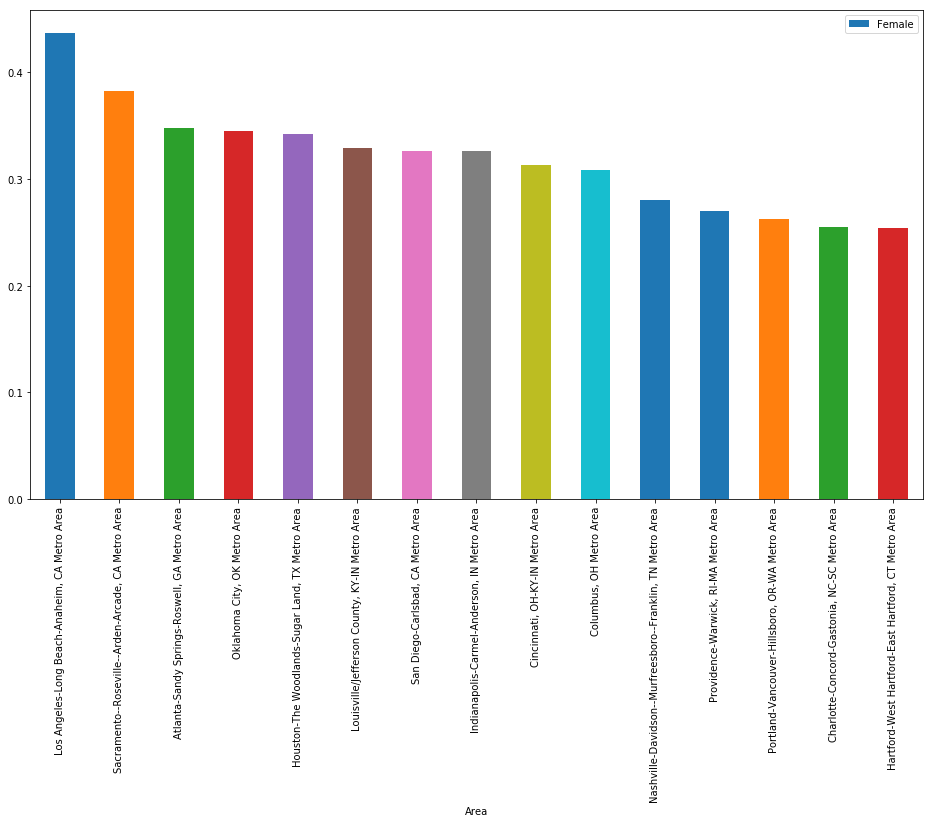

In [544]:
df4 = df4.sort_values('Female', ascending=False)
fig, ax = plt.subplots(figsize=(16,9))
df4.plot(kind='bar', x='Area', y='Female', ax=ax)
plt.xticks(rotation=90)

Here we have a categorical bar plot showing the percent female by metro. In this particular random sample we see Los Angeles with the most female business-owners at over 40% while Hartford lags at under 30%.

If desired, you can send your data back out to excel or a csv below.

In [532]:
#df4.to_excel("clean.xlsx")
#df4.to_csv("clean.csv")